# **Download Dataset BTC-USD year 2020 to 2023 from** [Finance.yahoo.com](https://finance.yahoo.com/quote/BTC-USD/history?period1=1589587200&period2=1684195200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true) 

---



---



In [364]:
import pandas as pd
my_list = "/content/BTC-USD 2020 - 2023.csv"
# df = pd.DataFrame (my_list)
df = pd.read_csv(my_list)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-16,9333.240234,9564.205078,9260.694336,9377.013672,9377.013672,36164766408
1,2020-05-17,9374.929688,9823.001953,9349.545898,9670.739258,9670.739258,40084250663
2,2020-05-18,9675.695313,9906.030273,9570.359375,9726.575195,9726.575195,41827139896
3,2020-05-19,9727.063477,9836.047852,9539.624023,9729.038086,9729.038086,39254288955
4,2020-05-20,9725.329102,9804.793945,9447.201172,9522.981445,9522.981445,36546239703


In [365]:
# import libraries

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
import math

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, Dense, LSTM ,Conv1D,Dropout,Bidirectional,Multiply,Flatten
plt.style.use('fivethirtyeight')

In [366]:
df.shape

(1095, 7)

In [367]:
df1=df.reset_index()['Close']

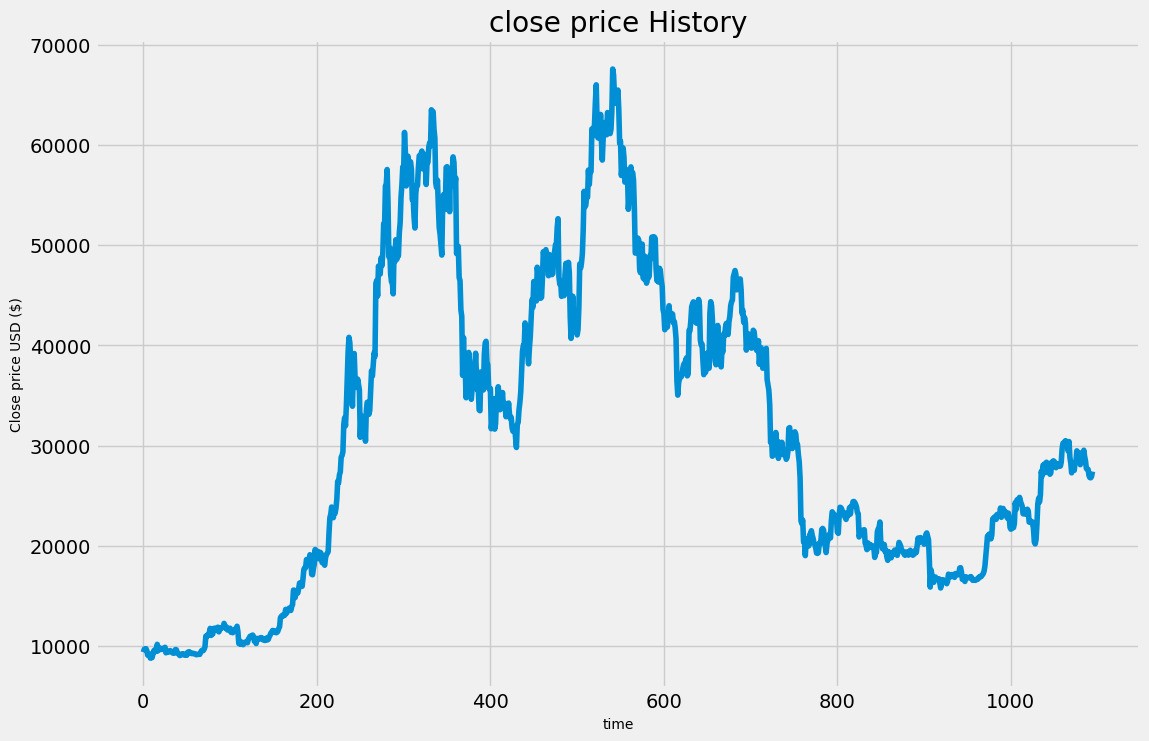

In [368]:
plt.figure(figsize = (12,8))
plt.title('close price History')
plt.plot(df1)
plt.xlabel('time', fontsize = 10)
plt.ylabel('Close price USD ($)', fontsize = 10)
plt.show()

In [369]:
df1

0        9377.013672
1        9670.739258
2        9726.575195
3        9729.038086
4        9522.981445
            ...     
1090    27000.789063
1091    26804.990234
1092    26784.078125
1093    26930.638672
1094    27406.390625
Name: Close, Length: 1095, dtype: float64

## **Data Preperation for train**

In [370]:
data = df.filter(['Close'])
dataset = data.values
train_data_len = math.ceil(len(dataset)*.85)
test_data_len = data[train_data_len:]
train_data_len

931

In [371]:
##splitting dataset into train and test split
# training_size=int(len(df1)*0.65)
# test_size=len(df1)-training_size
# train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [372]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scale_data=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [373]:
# scale_data

In [374]:
train_data = scale_data[0:train_data_len, :]

In [375]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [376]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)

In [377]:
print(X_train.shape), print(y_train.shape)

(920, 10)
(920,)


(None, None)

In [378]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)

## Data Preperation for test

In [379]:
test_data = scale_data[train_data_len - 11:, :]
test_data.shape

(175, 1)

In [380]:
X_test, ytest = create_dataset(test_data, time_step)

In [381]:
print(X_test.shape), print(ytest.shape)

(164, 10)
(164,)


(None, None)

In [382]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [383]:
# X_test.shape

## **Model training**

In [384]:
model = Sequential()
model.add(LSTM(80, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))
model.add(LSTM(80, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [385]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 10, 80)            26240     
                                                                 
 dropout_14 (Dropout)        (None, 10, 80)            0         
                                                                 
 lstm_28 (LSTM)              (None, 10, 80)            51520     
                                                                 
 dropout_15 (Dropout)        (None, 10, 80)            0         
                                                                 
 lstm_29 (LSTM)              (None, 50)                26200     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 104,011
Trainable params: 104,011
Non-t

In [386]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
29/29 [==============================] - 6s 41ms/step - loss: 0.0426 - val_loss: 0.0030
Epoch 2/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0041 - val_loss: 7.5251e-04
Epoch 3/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 6.9632e-04
Epoch 4/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 7.1925e-04
Epoch 5/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 6.7387e-04
Epoch 6/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 7.8913e-04
Epoch 7/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 7.2673e-04
Epoch 8/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 7.2648e-04
Epoch 9/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 6.3144e-04
Epoch 10/50
29/29 [==============================] - 0s 9ms/step - loss: 0.0032 - val

# Prediction for LSTM model

In [387]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [388]:
test_predict.shape

(164, 1)

In [389]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_pred=scaler.inverse_transform(test_predict)
# test_predict

In [390]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

36697.22579513615

In [391]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.01683267666506371

In [392]:
# ### Plotting 
# # shift train predictions for plotting
# look_back=10
# trainPredictPlot = np.empty_like(scale_data)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(scale_data)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(train_predict)+(look_back*2)+1:len(scale_data)-1, :] = test_predict
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(scale_data))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.legend(['actual', 'train pred', 'test pred'], loc = 'lower right')
# plt.show()

In [393]:
len(valid)

164

In [394]:
train = data[:train_data_len].astype(np.float32)
valid = data[train_data_len:].astype(np.float32)
valid['predictions'] = test_pred
valid.head()

,Close,predictions
931,16908.236328,17090.197266
932,17130.486328,17257.166016
933,16974.826172,17367.265625
934,17089.503906,17443.984375
935,16848.126953,17473.330078


In [395]:
train['Close'].dtype

dtype('float32')

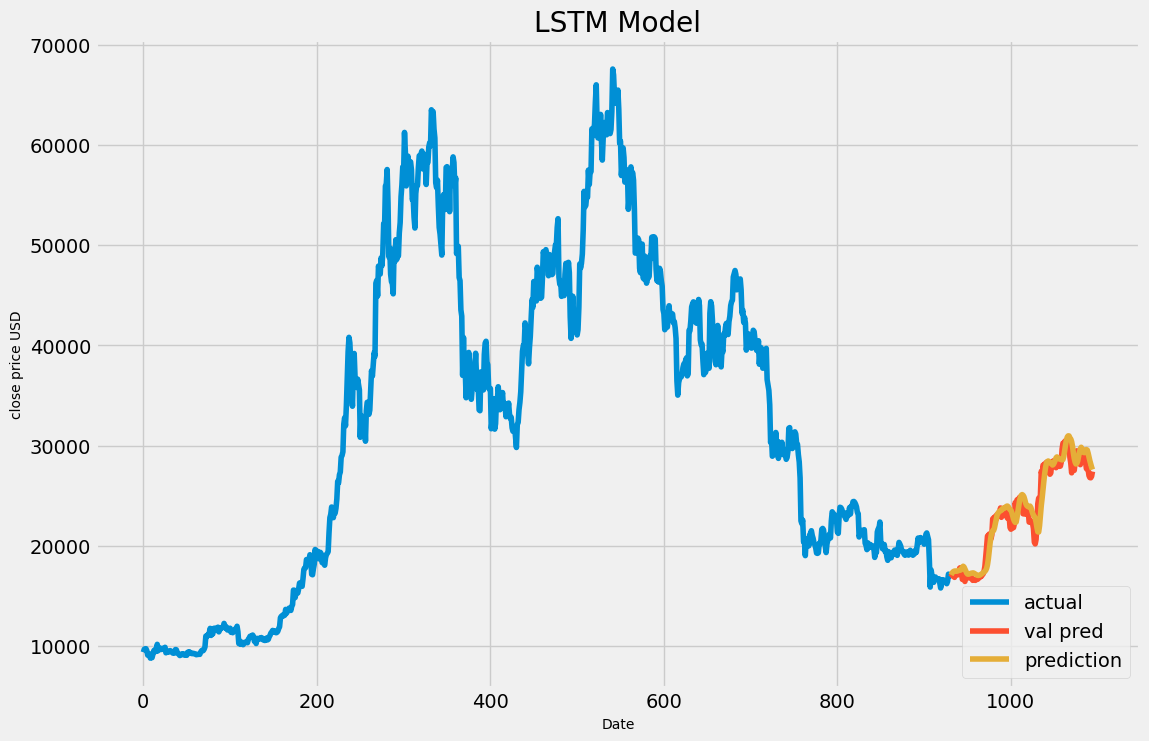

In [396]:
plt.figure(figsize = (12,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('close price USD', fontsize = 10)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['actual', 'val pred', 'prediction'], loc = 'lower right')
plt.show()

# **Predict the close price of next 7 days**

In [397]:
len(test_data)

175

In [398]:
x_input=test_data[75:].reshape(1,-1)
x_input.shape

(1, 100)

In [399]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [400]:
# demonstrate prediction for next 10 days
from numpy import array
# days = 7
lst_output=[]
n_steps=100
i=0
while(i<7):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.35421696]
101
1 day input [0.23767578 0.24625374 0.24072614 0.22166478 0.21880895 0.22254669
 0.22114015 0.22147869 0.22850026 0.26400831 0.25236475 0.26839373
 0.26968125 0.26434519 0.27287762 0.26619475 0.26198372 0.25787746
 0.24512805 0.24474095 0.25130545 0.25065312 0.24426421 0.25275736
 0.2498466  0.23091407 0.23075533 0.23215324 0.23205531 0.22848265
 0.2199471  0.19689266 0.19390205 0.20147593 0.22753295 0.26213156
 0.27146422 0.26516726 0.27668255 0.31702422 0.30923112 0.32748328
 0.32286511 0.32981653 0.31504227 0.33250734 0.31820421 0.3182284
 0.32672879 0.31219166 0.31437352 0.33275351 0.32739628 0.33496601
 0.33381845 0.33021622 0.32325616 0.32968508 0.32985342 0.32757625
 0.32556386 0.32593706 0.33249166 0.35494843 0.36485168 0.36321828
 0.36764205 0.36911599 0.36627126 0.36621782 0.3514107  0.3676163
 0.34082202 0.33101041 0.31452289 0.32372028 0.31987324 0.31874958
 0.33205861 0.33401694 0.35189971 0.34962796 0.34806656 0.34841225
 0.32838317 0.33840366 0.34394621 0

In [401]:
day_new=np.arange(1,100)
day_pred=np.arange(101,108)

In [402]:
import matplotlib.pyplot as plt

In [403]:
len(df1)

1095

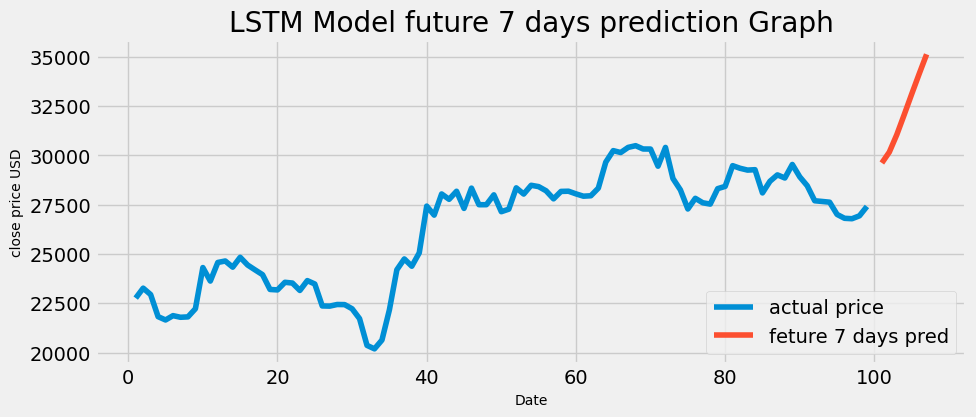

In [404]:
plt.figure(figsize = (10,4))
plt.title('LSTM Model future 7 days prediction Graph')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('close price USD', fontsize = 10)
plt.plot(day_new,scaler.inverse_transform(scale_data[996:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.legend(['actual price', 'feture 7 days pred'], loc = 'lower right')
plt.show()

# **Create a RNN Model with BiGRU**

In [326]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

# **Create a Model RNN with bilstm**
RNN_model = Sequential()
RNN_model.add(layers.Bidirectional(
layers.GRU(32),input_shape=(X_train.shape[1],1)))
RNN_model.add(layers.Dense(1))

RNN_model.compile(optimizer=RMSprop(), loss='mae')

history = RNN_model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=32,verbose=1)


Epoch 1/50
29/29 [==============================] - 4s 37ms/step - loss: 0.1367 - val_loss: 0.0519
Epoch 2/50
29/29 [==============================] - 0s 10ms/step - loss: 0.0332 - val_loss: 0.0125
Epoch 3/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0316 - val_loss: 0.0173
Epoch 4/50
29/29 [==============================] - 0s 9ms/step - loss: 0.0296 - val_loss: 0.0183
Epoch 5/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0298 - val_loss: 0.0150
Epoch 6/50
29/29 [==============================] - 0s 11ms/step - loss: 0.0266 - val_loss: 0.0188
Epoch 7/50
29/29 [==============================] - 0s 7ms/step - loss: 0.0256 - val_loss: 0.0278
Epoch 8/50
29/29 [==============================] - 0s 7ms/step - loss: 0.0251 - val_loss: 0.0286
Epoch 9/50
29/29 [==============================] - 0s 6ms/step - loss: 0.0255 - val_loss: 0.0181
Epoch 10/50
29/29 [==============================] - 0s 6ms/step - loss: 0.0247 - val_loss: 0.0150
Epoch 11/50
29/2

## Prediction 

In [327]:
biGRU_train_predict=RNN_model.predict(X_train)
biGRU_test_predict=RNN_model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [328]:
##Transformback to original form
biGRU_train_predict=scaler.inverse_transform(biGRU_train_predict)
biGRU_test_pred=scaler.inverse_transform(biGRU_test_predict)
# test_predict

In [329]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,biGRU_train_predict))

36233.09735220454

In [330]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,biGRU_test_predict))

0.010294991665290628

In [153]:
train = data[:train_data_len].astype(np.float32)
valid = data[train_data_len:].astype(np.float32)
valid['predictions'] = test_pred
valid.head()

,Close,predictions
931,16908.236328,16739.376953
932,17130.486328,16901.308594
933,16974.826172,17025.281250
934,17089.503906,17116.460938
935,16848.126953,17157.537109


In [331]:
train['Close'].dtype

dtype('float32')

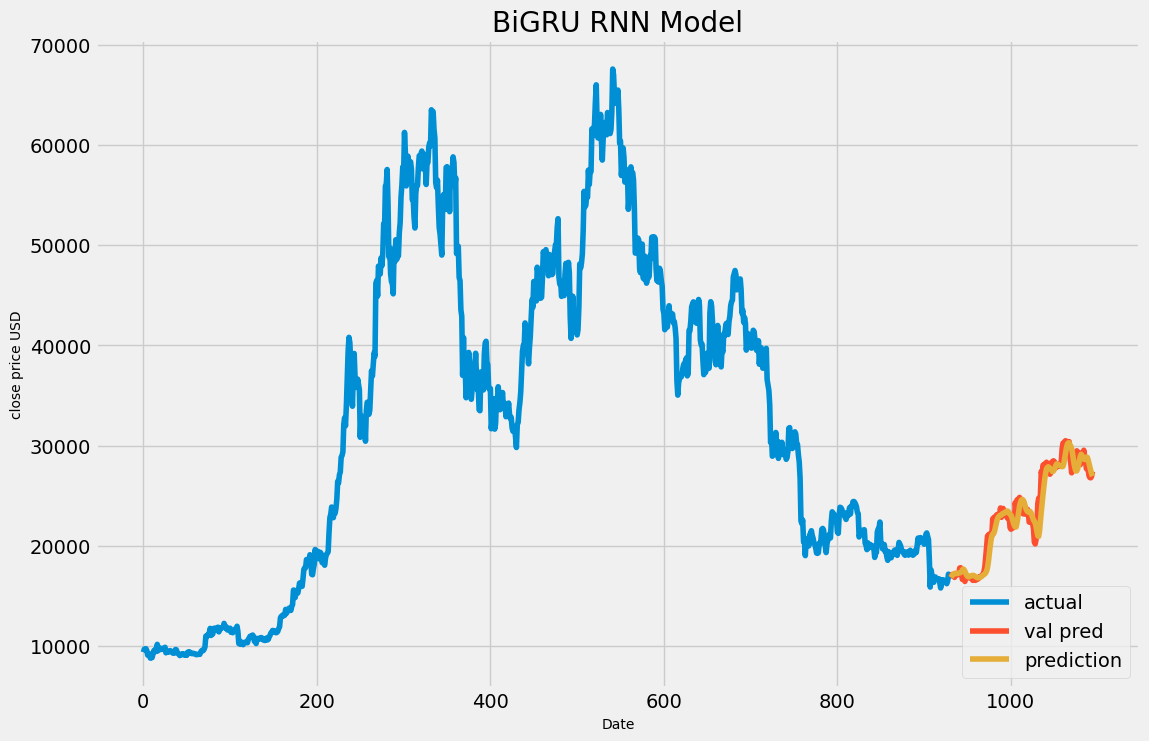

In [332]:
plt.figure(figsize = (12,8))
plt.title('BiGRU RNN Model')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('close price USD', fontsize = 10)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['actual', 'val pred', 'prediction'], loc = 'lower right')
plt.show()

# **Predict the close price of next 7 days using biGRU Model**

In [333]:
len(test_data)

175

In [334]:
x_input=test_data[75:].reshape(1,-1)
x_input.shape

(1, 100)

In [335]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [336]:
# demonstrate prediction for next 10 days
from numpy import array
# days = 7
lst_output=[]
n_steps=100
i=0
while(i<7):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = RNN_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
GRU_df3 = scaler.inverse_transform(lst_output)
print("Future 7 days close price prediction for GRU: ",GRU_df3)
print(lst_output)

[0.3094545]
101
1 day input [0.23767578 0.24625374 0.24072614 0.22166478 0.21880895 0.22254669
 0.22114015 0.22147869 0.22850026 0.26400831 0.25236475 0.26839373
 0.26968125 0.26434519 0.27287762 0.26619475 0.26198372 0.25787746
 0.24512805 0.24474095 0.25130545 0.25065312 0.24426421 0.25275736
 0.2498466  0.23091407 0.23075533 0.23215324 0.23205531 0.22848265
 0.2199471  0.19689266 0.19390205 0.20147593 0.22753295 0.26213156
 0.27146422 0.26516726 0.27668255 0.31702422 0.30923112 0.32748328
 0.32286511 0.32981653 0.31504227 0.33250734 0.31820421 0.3182284
 0.32672879 0.31219166 0.31437352 0.33275351 0.32739628 0.33496601
 0.33381845 0.33021622 0.32325616 0.32968508 0.32985342 0.32757625
 0.32556386 0.32593706 0.33249166 0.35494843 0.36485168 0.36321828
 0.36764205 0.36911599 0.36627126 0.36621782 0.3514107  0.3676163
 0.34082202 0.33101041 0.31452289 0.32372028 0.31987324 0.31874958
 0.33205861 0.33401694 0.35189971 0.34962796 0.34806656 0.34841225
 0.32838317 0.33840366 0.34394621 0.

In [337]:
day_new=np.arange(1,100)
day_pred=np.arange(101, 108)

In [338]:
len(df1)

1095

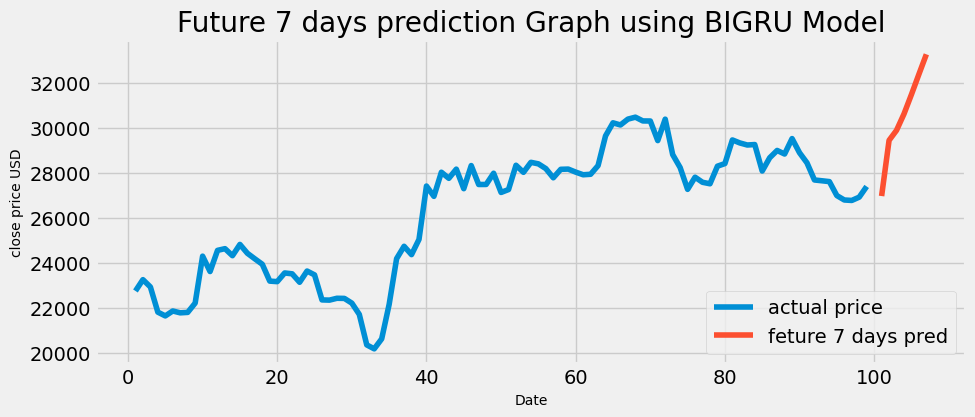

In [340]:
plt.figure(figsize = (10,4))
plt.title('Future 7 days prediction Graph using BIGRU Model')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('close price USD', fontsize = 10)
plt.plot(day_new,scaler.inverse_transform(scale_data[996:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.legend(['actual price', 'feture 7 days pred'], loc = 'lower right')
plt.show()

# Create a Model with combinition of CNN & bilstm

In [344]:
print(X_train.shape[1],1)

10 1


In [345]:
CNN_model = Sequential()
CNN_model.add(layers.Conv1D(64, 3, activation='relu',input_shape=(X_train.shape[1],1)))
CNN_model.add(layers.MaxPooling1D(3))
CNN_model.add(layers.LSTM(80, dropout=0.3, recurrent_dropout=0.5))
CNN_model.add(layers.Dense(1))
CNN_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 8, 64)             256       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 2, 64)            0         
 1D)                                                             
                                                                 
 lstm_26 (LSTM)              (None, 80)                46400     
                                                                 
 dense_13 (Dense)            (None, 1)                 81        
                                                                 
Total params: 46,737
Trainable params: 46,737
Non-trainable params: 0
_________________________________________________________________


In [346]:
CNN_model.compile(optimizer=RMSprop(), loss='mae')

history = CNN_model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
29/29 [==============================] - 3s 25ms/step - loss: 0.1228 - val_loss: 0.0205
Epoch 2/50
29/29 [==============================] - 0s 15ms/step - loss: 0.0520 - val_loss: 0.0216
Epoch 3/50
29/29 [==============================] - 0s 14ms/step - loss: 0.0511 - val_loss: 0.0197
Epoch 4/50
29/29 [==============================] - 0s 14ms/step - loss: 0.0499 - val_loss: 0.0198
Epoch 5/50
29/29 [==============================] - 0s 15ms/step - loss: 0.0503 - val_loss: 0.0426
Epoch 6/50
29/29 [==============================] - 0s 14ms/step - loss: 0.0503 - val_loss: 0.0213
Epoch 7/50
29/29 [==============================] - 0s 15ms/step - loss: 0.0473 - val_loss: 0.0187
Epoch 8/50
29/29 [==============================] - 0s 14ms/step - loss: 0.0463 - val_loss: 0.0399
Epoch 9/50
29/29 [==============================] - 0s 14ms/step - loss: 0.0495 - val_loss: 0.0198
Epoch 10/50
29/29 [==============================] - 0s 16ms/step - loss: 0.0471 - val_loss: 0.0252
Epoch 11/

## Prediction 

In [347]:
cnn_train_predict=CNN_model.predict(X_train)
cnn_test_predict=CNN_model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [348]:
##Transformback to original form
cnn_train_predict=scaler.inverse_transform(cnn_train_predict)
cnn_test_pred=scaler.inverse_transform(cnn_test_predict)
# test_predict

In [349]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,cnn_train_predict))

34078.91126582176

In [350]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,cnn_test_pred))

22165.759468424792

In [351]:
train = data[:train_data_len].astype(np.float32)
valid = data[train_data_len:].astype(np.float32)
valid['predictions'] = test_pred
valid.head()

,Close,predictions
931,16908.236328,16840.917969
932,17130.486328,16996.816406
933,16974.826172,17113.771484
934,17089.503906,17199.736328
935,16848.126953,17237.419922


In [352]:
train['Close'].dtype

dtype('float32')

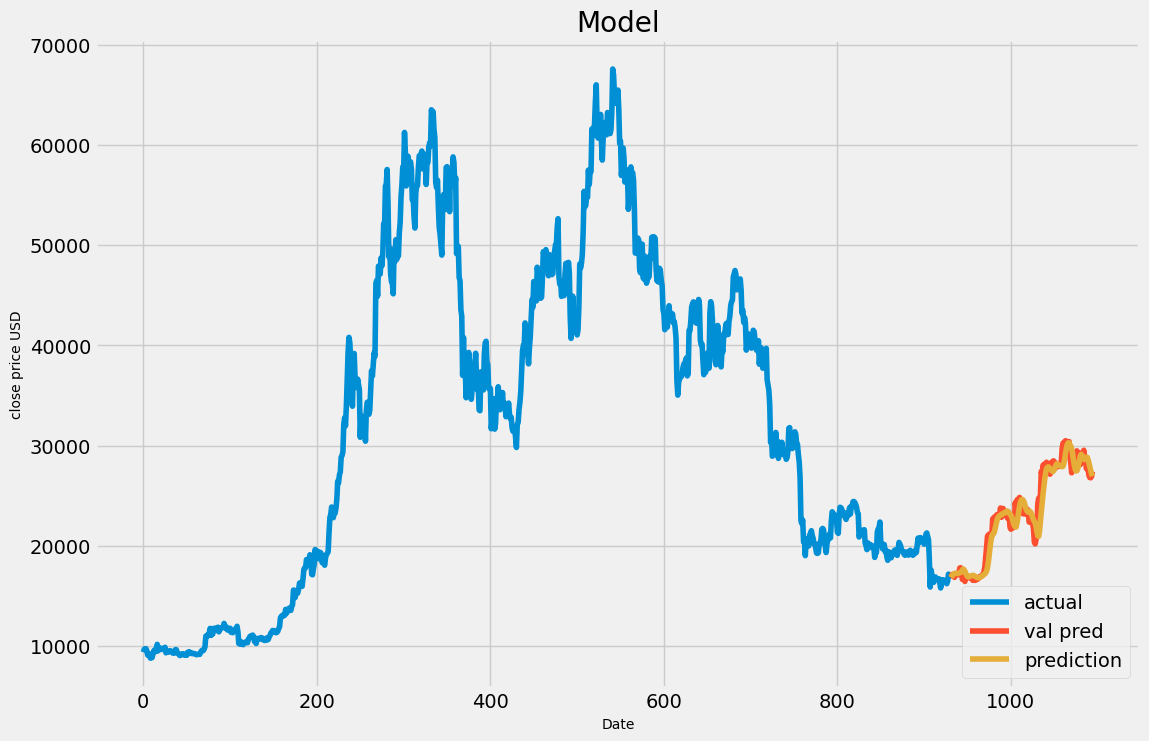

In [354]:
plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('close price USD', fontsize = 10)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['actual', 'val pred', 'prediction'], loc = 'lower right')
plt.show()

# **Predict the close price using CNN-BiLSTM Model of next 7 days**

In [355]:
len(test_data)

175

In [356]:
x_input=test_data[75:].reshape(1,-1)
x_input.shape

(1, 100)

In [357]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [358]:
# demonstrate prediction for next 10 days
from numpy import array
# days = 7
lst_output=[]
n_steps=100
i=0
while(i<7):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = CNN_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.51180255]
101
1 day input [0.23767578 0.24625374 0.24072614 0.22166478 0.21880895 0.22254669
 0.22114015 0.22147869 0.22850026 0.26400831 0.25236475 0.26839373
 0.26968125 0.26434519 0.27287762 0.26619475 0.26198372 0.25787746
 0.24512805 0.24474095 0.25130545 0.25065312 0.24426421 0.25275736
 0.2498466  0.23091407 0.23075533 0.23215324 0.23205531 0.22848265
 0.2199471  0.19689266 0.19390205 0.20147593 0.22753295 0.26213156
 0.27146422 0.26516726 0.27668255 0.31702422 0.30923112 0.32748328
 0.32286511 0.32981653 0.31504227 0.33250734 0.31820421 0.3182284
 0.32672879 0.31219166 0.31437352 0.33275351 0.32739628 0.33496601
 0.33381845 0.33021622 0.32325616 0.32968508 0.32985342 0.32757625
 0.32556386 0.32593706 0.33249166 0.35494843 0.36485168 0.36321828
 0.36764205 0.36911599 0.36627126 0.36621782 0.3514107  0.3676163
 0.34082202 0.33101041 0.31452289 0.32372028 0.31987324 0.31874958
 0.33205861 0.33401694 0.35189971 0.34962796 0.34806656 0.34841225
 0.32838317 0.33840366 0.34394621 0

In [359]:
day_new=np.arange(1,100)
day_pred=np.arange(101,108)

In [360]:
import matplotlib.pyplot as plt

In [361]:
len(df1)

1095

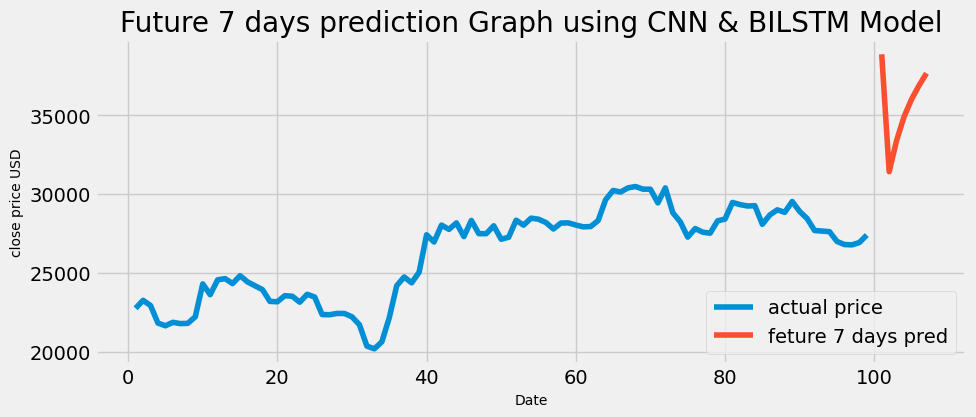

In [362]:
plt.figure(figsize = (10,4))
plt.title('Future 7 days prediction Graph using CNN & BILSTM Model')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('close price USD', fontsize = 10)
plt.plot(day_new,scaler.inverse_transform(scale_data[996:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.legend(['actual price', 'feture 7 days pred'], loc = 'lower right')
plt.show()

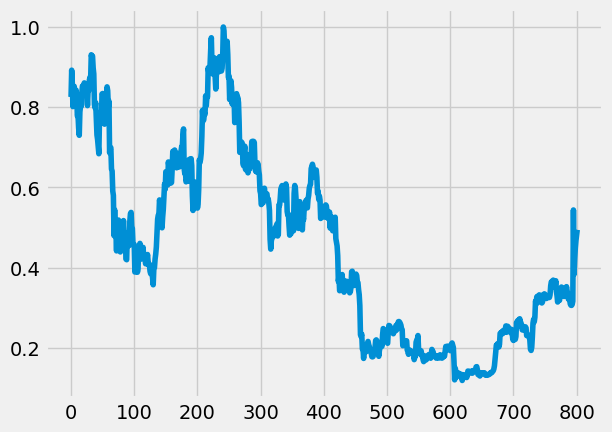

In [187]:
df3=scale_data.tolist()
df3.extend(lst_output)
plt.plot(df3[300:])
# len(df3)

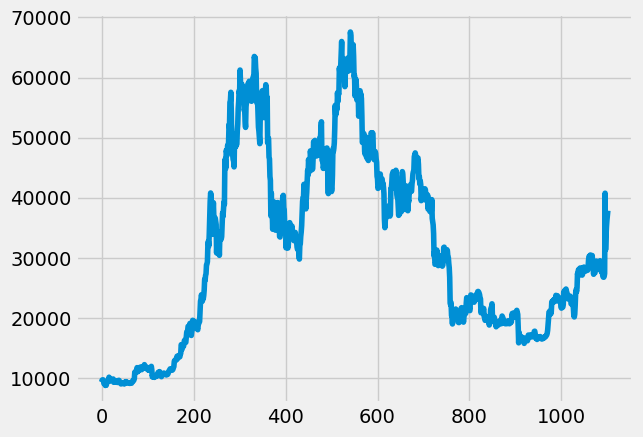

In [188]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [190]:
# print("Fetur 5 days close price prediction: ",df3)